In [3]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [26]:
#Loading Dataset

df = pd.read_csv(r'E:\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

#Our dataset includes 891 rows and 12 columns

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#There are null values present in 'Age','Cabin','Embarked'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Let's check coloumns uniqueness :

for i in df.columns:
    print (i,':',len(df[i].unique()))

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 148
Embarked : 4


In [27]:
df=df.drop(columns=['PassengerId','Name'],axis=1)

#Dropping columns 'PassengerId and Name' as they are not necessary

In [28]:
df=df.drop(columns=['Cabin'],axis=1)

#As most of its data is missing

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [29]:
#Treating null data

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [30]:
df = df.drop(columns=['Ticket'])

In [31]:
#Coverting Object data into Numeric
df1 = pd.get_dummies(df)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


##### Data Visualisation

0    549
1    342
Name: Survived, dtype: int64

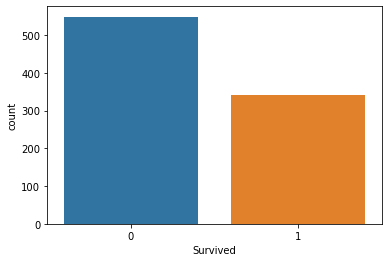

In [32]:
sns.countplot(x='Survived',data=df)
df['Survived'].value_counts()

In [ ]:
#Dataset looks balanced

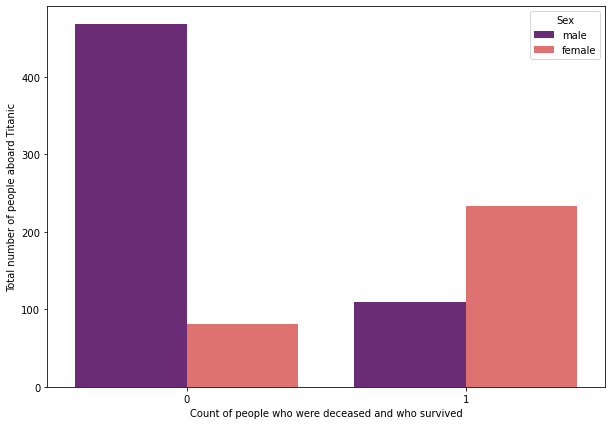

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Sex' , palette="magma")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

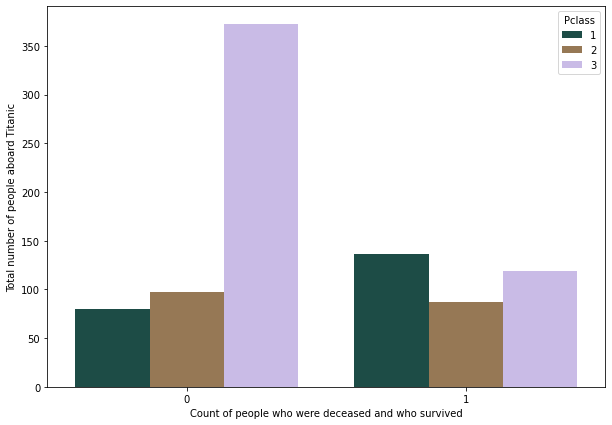

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Pclass', palette="cubehelix")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

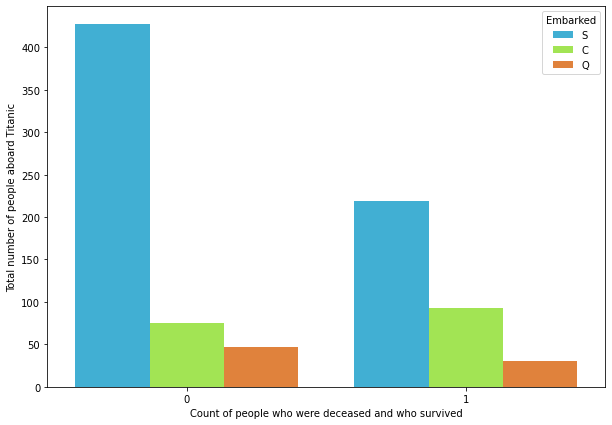

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = df, hue='Embarked', palette="turbo")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

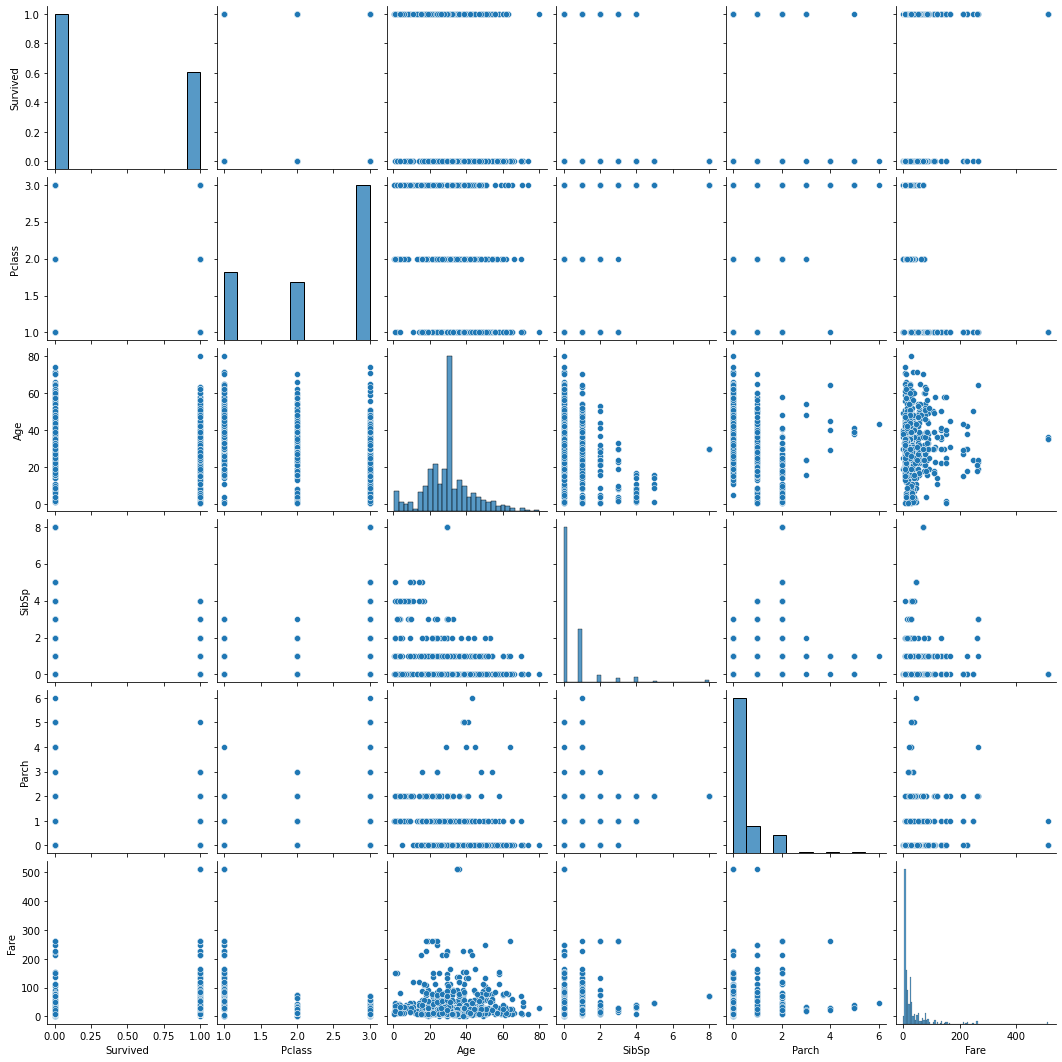

In [36]:
sns.pairplot(df)
plt.show()

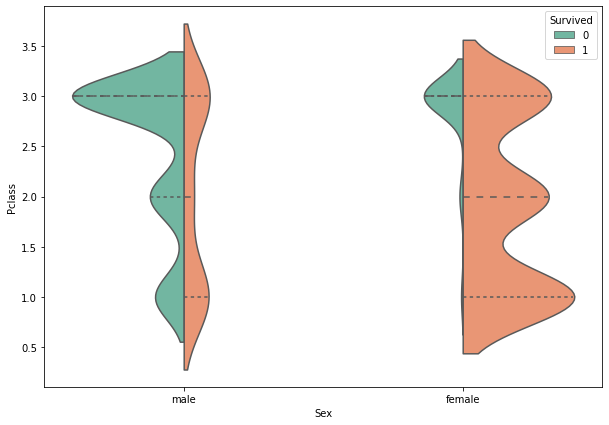

In [37]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=df, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

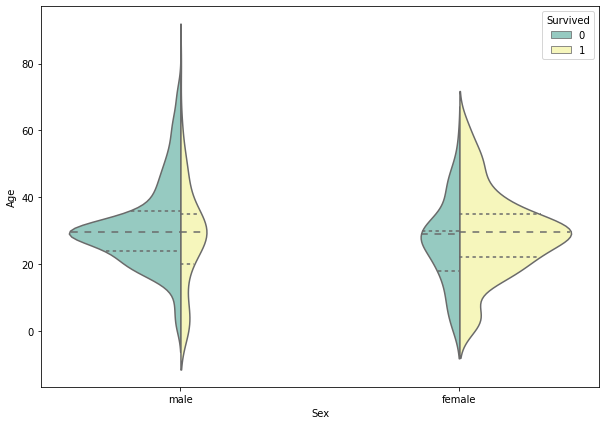

In [38]:

plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

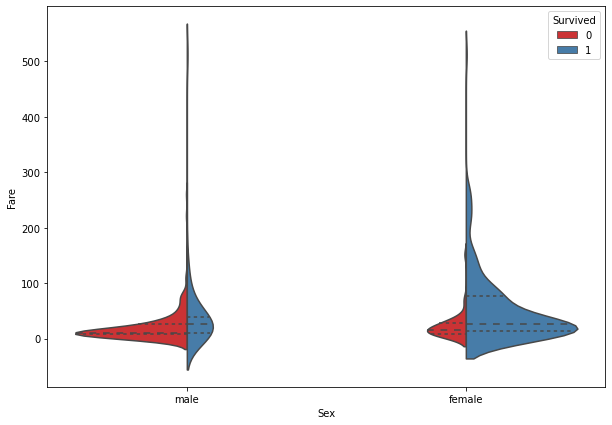

In [39]:

plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

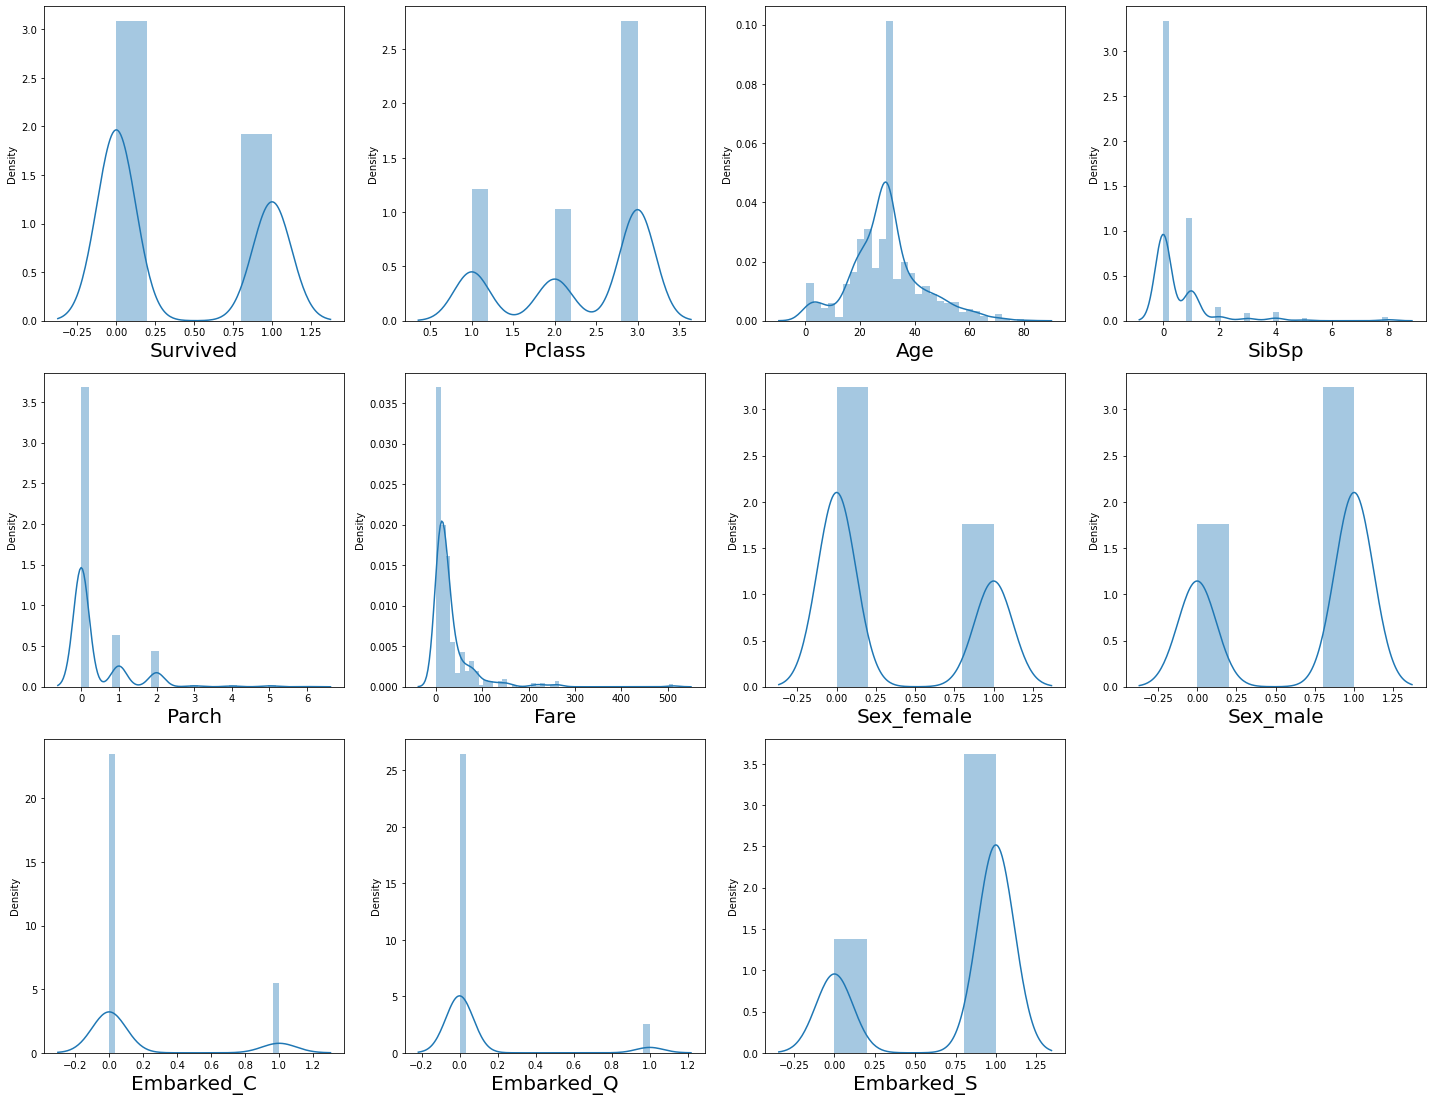

In [40]:
#Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df1:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

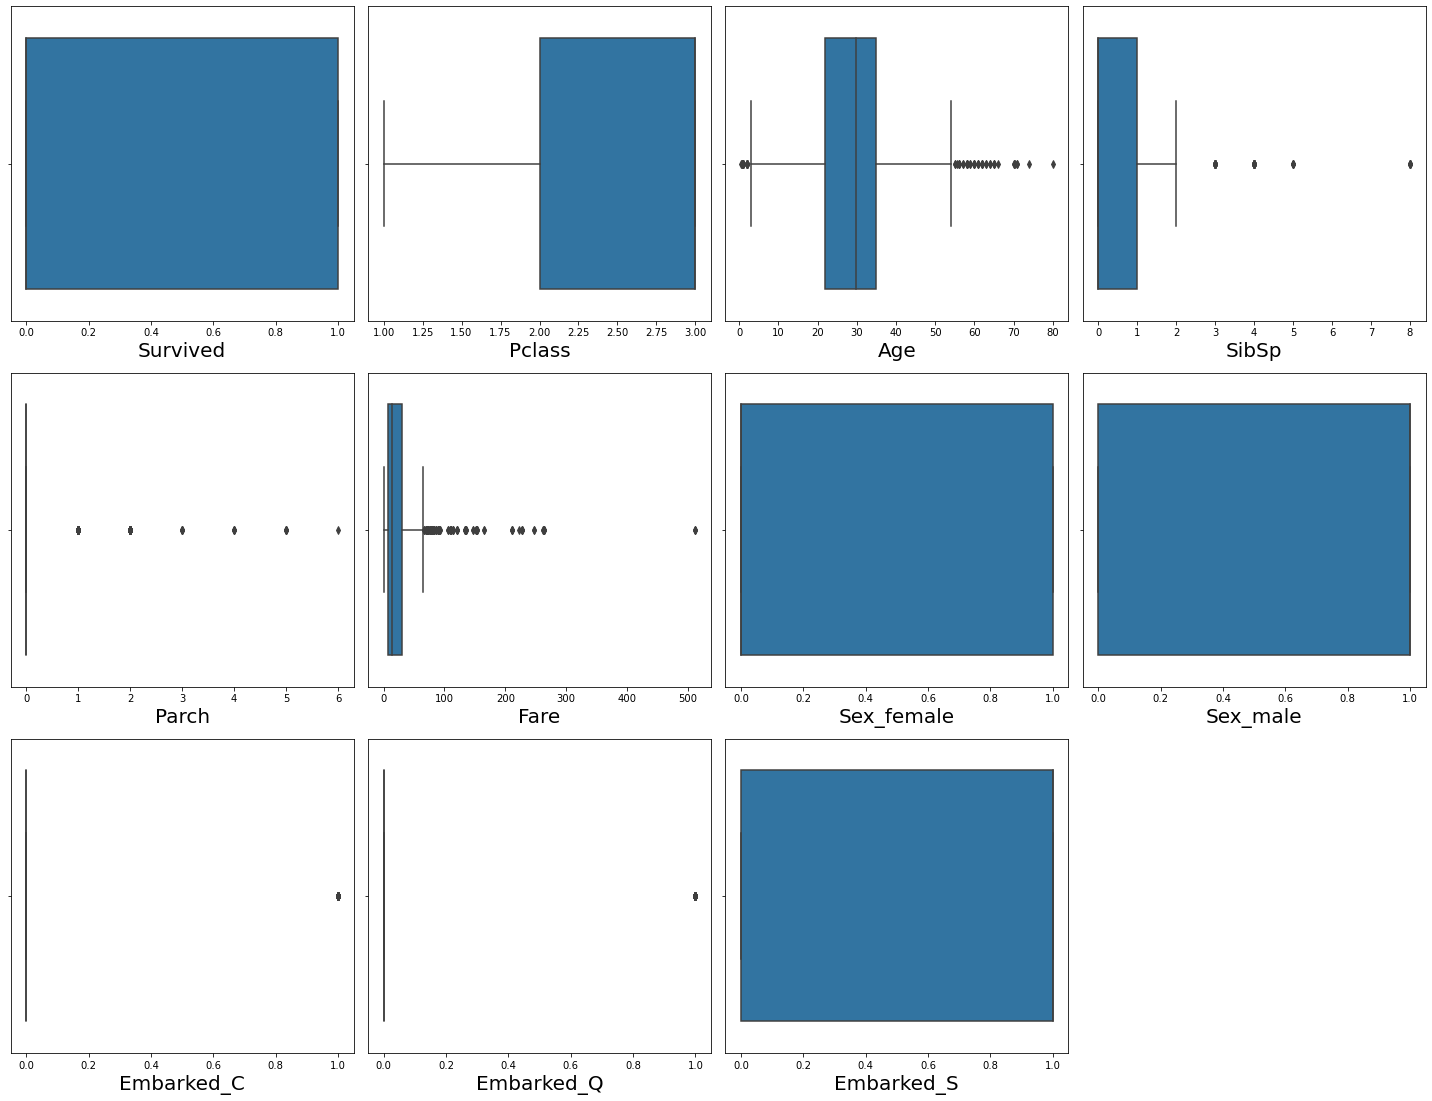

In [41]:
#Box plot to check outliers

plt.figure(figsize=(20,25))

plotnumber=1

for column in df1:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

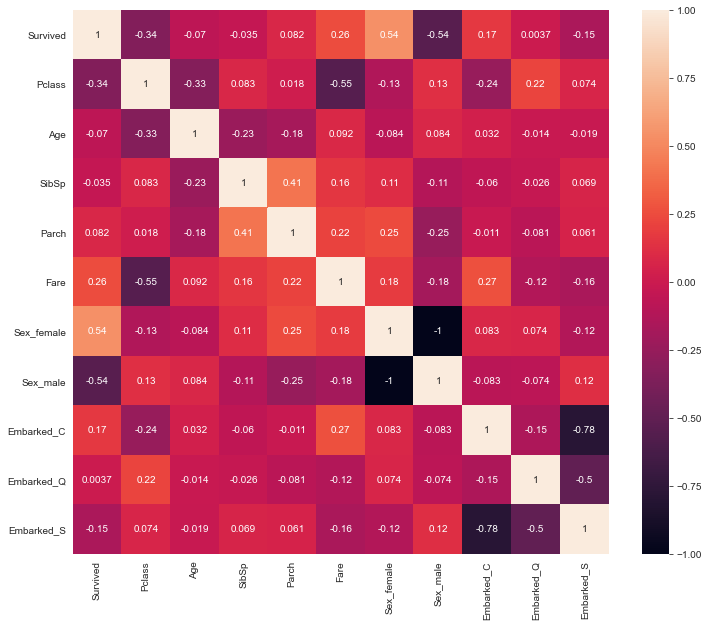

In [45]:
#HeatMap and Correlation

sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
corr = df1.corr()
sns.heatmap(corr, annot=True)

In [42]:
# Removing outliers using Quantile menthod in continous data

q = df1['Age'].quantile(0.98)
data_cleaned = df1[df1['Age']<q]
q = data_cleaned['Fare'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Fare']<q]

In [43]:
#Checking Skewness

data_cleaned.skew()

Survived      0.501183
Pclass       -0.731934
Age           0.081996
SibSp         3.729793
Parch         2.823212
Fare          2.273200
Sex_female    0.627646
Sex_male     -0.627646
Embarked_C    1.674393
Embarked_Q    2.915410
Embarked_S   -1.053532
dtype: float64

In [58]:
#Splitting feature and target

x = data_cleaned.drop(columns=['Survived'],axis=1)
y = data_cleaned['Survived']

In [59]:
#Scaling features

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(x)

In [60]:
#Model Instantation and Training

#Importing Models and other libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

In [ ]:
#Finding Best Random state


In [61]:
max_accu = 0
max_rs = 0
for i in range(50,500):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8598130841121495 on Random State 153


In [64]:
#Train test split with best random state

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 153)

In [65]:
#Logistic Regression

rslt=[] #Making Empty List to store Results

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.7906197654941374
TESTING SCORE :  0.828125
ACCURACY : 0.828125
*****************************
[[146  18]
 [ 26  66]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       164
           1       0.79      0.72      0.75        92

    accuracy                           0.83       256
   macro avg       0.82      0.80      0.81       256
weighted avg       0.83      0.83      0.83       256



In [66]:
#Random Forest

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.983249581239531
TESTING SCORE :  0.8203125
ACCURACY : 0.8203125
*****************************
[[143  21]
 [ 25  67]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       164
           1       0.76      0.73      0.74        92

    accuracy                           0.82       256
   macro avg       0.81      0.80      0.80       256
weighted avg       0.82      0.82      0.82       256



In [67]:
#Decision Tree

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.983249581239531
TESTING SCORE :  0.796875
ACCURACY : 0.796875
*****************************
[[137  27]
 [ 25  67]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       164
           1       0.71      0.73      0.72        92

    accuracy                           0.80       256
   macro avg       0.78      0.78      0.78       256
weighted avg       0.80      0.80      0.80       256



In [68]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.828125
1,Random Forest,0.820312
2,Decision Tree,0.796875


In [69]:
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()


,CV Mean,Std
Logistic Regression,0.783920,0.041641
Random Forest,0.783920,0.022845
Decision Tree,0.748744,0.010856


In [ ]:
# All models perform well with their least difference between CV score and accuracy

In [70]:
#Roc_auc_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [71]:
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.8038176033934253
ROC_AUC_SCORE_RANDOM_FOREST : 0.8001060445387062
ROC_AUC_SCORE_DECISION_TREE : 0.7818133616118769


In [73]:
#Going Forward for hyperparameter tuning in logistic regression with grid search cv

from sklearn.model_selection import GridSearchCV
from pprint import pprint

pprint(lr.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [74]:
params = {
         'max_iter':(100,200,300),
         'n_jobs':[-1],
         }
grid = GridSearchCV(LogisticRegression()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': (100, 200, 300), 'n_jobs': [-1]})

In [75]:
best_param = grid.best_params_
best_param

{'max_iter': 100, 'n_jobs': -1}

In [76]:
lr_tuned=LogisticRegression(max_iter=100,n_jobs=-1)
lr_tuned.fit(x_train,y_train)

LogisticRegression(n_jobs=-1)

In [77]:
y_pred_lr = lr_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred_lr)

print('TRAINING SCORE : ', lr_tuned.score(x_train,y_train))
print('TESTING SCORE : ', lr_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred_lr))
print('*****************************')
print(classification_report(y_test,y_pred_lr))

TRAINING SCORE :  0.7906197654941374
TESTING SCORE :  0.828125
ACCURACY : 0.828125
*****************************
[[146  18]
 [ 26  66]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       164
           1       0.79      0.72      0.75        92

    accuracy                           0.83       256
   macro avg       0.82      0.80      0.81       256
weighted avg       0.83      0.83      0.83       256



##### Efficiency Achieved

- After hyperparameter tuning we achieved increase in model accuracy and True Positive Rate

In [78]:
#Model Saving

import joblib
joblib.dump(lr_tuned,'Titanic.pkl')

['Titanic.pkl']